# Experiment 4

In [1]:

import pandas as pd

import quantstats as qs
from tinycta.portfolio import build_portfolio
from tinycta.signal import *


In [2]:
# Load prices
prices = pd.read_csv("data/p_hashed.csv", index_col=0, parse_dates=True).ffill().truncate(before="1970-01-01")

In [3]:
from ipywidgets import Label, HBox, VBox, IntSlider, FloatSlider

fast = IntSlider(min=4, max=192, step=4, value=32)
slow = IntSlider(min=4, max=192, step=4, value=96)
vola = IntSlider(min=4, max=192, step=4, value=32)
winsor = FloatSlider(min=1.0, max=6.0, step=0.1, value=4.2)
left_box = VBox([Label("Fast Moving Average"), Label("Slow Moving Average"), Label("Volatility"), Label("Winsorizing")])
right_box = VBox([fast, slow, vola, winsor])
HBox([left_box, right_box])

In [4]:
mu = np.tanh(prices.apply(returns_adjust, com=vola.value, clip=winsor.value).cumsum().apply(osc, fast=fast.value, slow=slow.value))
vola = prices.pct_change().ewm(com=vola.value, min_periods=vola.value).std()

# compute the series of Euclidean norms by compute the sum of squares for each row
euclid_norm = np.sqrt((mu*mu).sum(axis=1))

# Divide each column of mu by the Euclidean norm
risk_scaled = mu.apply(lambda x: x/euclid_norm, axis=0)

portfolio = build_portfolio(prices=prices, position=risk_scaled/vola)

/home/thomas/.pyenv/versions/3.10.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


                    Strategy
------------------  ----------
Start Period        1990-01-02
End Period          2023-04-14
Risk-Free Rate      0.0%
Time in Market      96.0%

Cumulative Return   11.41%
CAGR﹪              0.33%

Sharpe              0.91
Prob. Sharpe Ratio  100.0%
Sortino             1.3
Sortino/√2          0.92
Omega               1.17

Max Drawdown        -1.01%
Longest DD Days     1472

Gain/Pain Ratio     0.17
Gain/Pain (1M)      1.03

Payoff Ratio        0.98
Profit Factor       1.17
Common Sense Ratio  1.2
CPC Index           0.63
Tail Ratio          1.02
Outlier Win Ratio   3.62
Outlier Loss Ratio  3.71

MTD                 0.04%
3M                  0.06%
6M                  -0.16%
YTD                 0.03%
1Y                  0.16%
3Y (ann.)           0.37%
5Y (ann.)           0.14%
10Y (ann.)          0.24%
All-time (ann.)     0.33%

Avg. Drawdown       -0.07%
Avg. Drawdown Days  36
Recovery Factor     11.3
Ulcer Index         0.0
Serenity Index      1.55


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


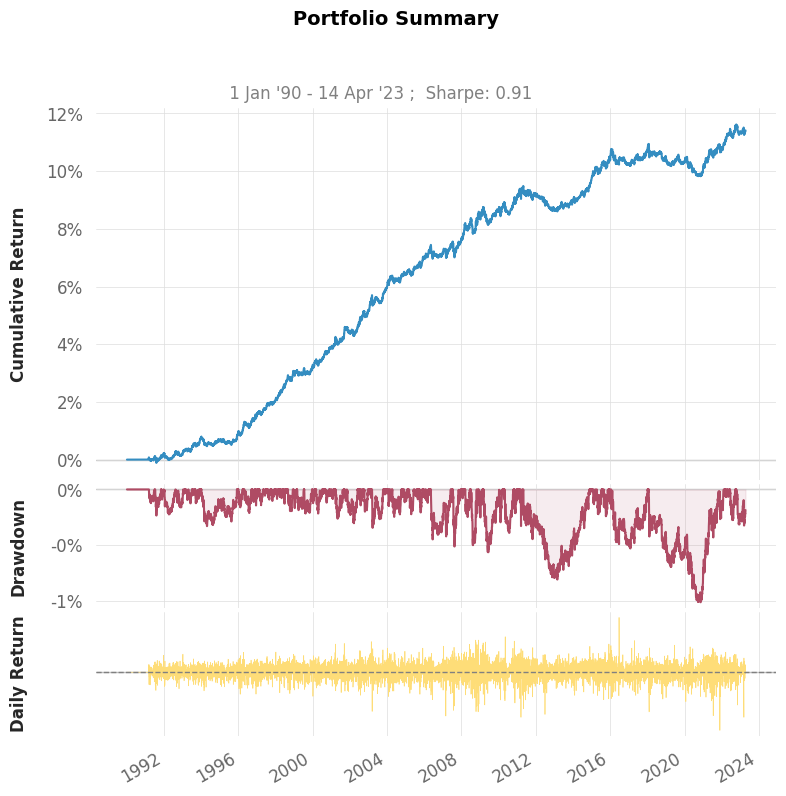

/home/thomas/.pyenv/versions/3.10.10/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


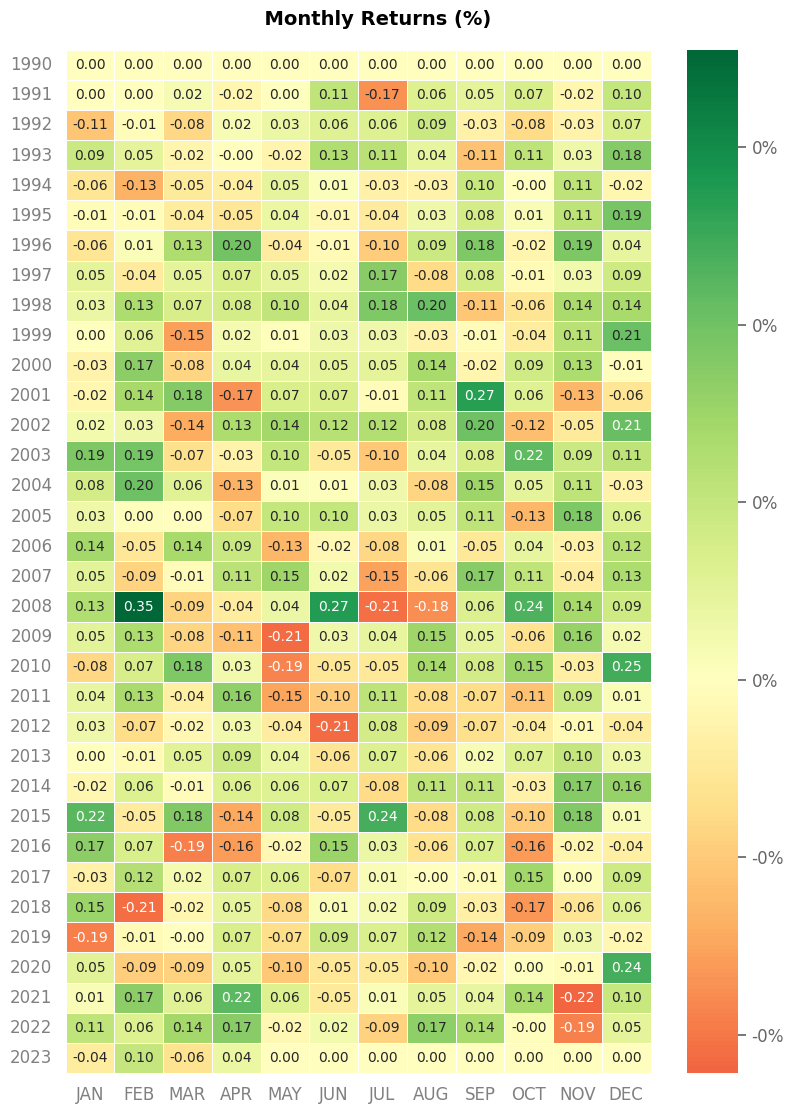

In [5]:
qs.reports.basic(portfolio.returns(init_capital=10000))